In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
def Progonka(A, B, C, F):
    N = A.shape[0]
    X = np.zeros_like(A)
    
    beta = np.zeros_like(A)
    #phi = np.zeros((N, ))
    
    beta[0] = B[0] / A[0]
    X[0] = F[0] / A[0]
    
    for i in range(1, N):
        beta[i] = B[i] / (A[i] - beta[i - 1] * C[i])
        X[i] = (F[i] - C[i] * X[i - 1]) / (A[i] - beta[i - 1] * C[i])
    #X[-1] = phi[-1]
    for i in range(N-2, -1, -1):
        X[i] -=  X[i + 1] * beta[i]
    return X

In [3]:
def getDxCoeffs(h):
    h1 = h[:-1]
    h2 = h[1:]
    shape = (len(h) + 1, )
    A, B, C = np.zeros(shape), np.zeros(shape), np.zeros(shape)
    A[1:-1] = (h2 - h1) / (h2 * h1)
    B[1:-1] = (h1 / h2) / (h1 + h2)
    C[1:-1] = -(h2 / h1) / (h1 + h2) 
    return A, B, C

In [4]:
def getD2XCoeffs(h):
    h1 = h[:-1]
    h2 = h[1:]
    shape = (len(h) + 1, )
    A, B, C = np.zeros(shape), np.zeros(shape), np.zeros(shape)

    A[1:-1] = -2.0 / (h2 * h1)
    B[1:-1] = 2.0 / h2 / (h1 + h2)
    C[1:-1] = 2.0 / h1 / (h1 + h2)
    return A, B, C

In [165]:
def getCoeffs(r, sig, T, z, hz):    
    A1, B1, C1 = getDxCoeffs(hz)
    
    A2, B2, C2 = getD2XCoeffs(hz)
    
    #nu = -( r + sig ** 2 / 2 + np.exp(-w) / T )
    
    nu = (-r * z + 1 / T)
    sig_ = 0.5 * sig ** 2 * z ** 2
    
    A = sig_ * A2 + nu * A1
    B = sig_ * B2 + nu * B1
    C = sig_ * C2 + nu * C1
    
    return A, B, C

In [166]:
def solve(r, sig, T, Nt, z, hz):
    #w = np.log(-z)[::-1]
    
    u = np.zeros((Nt + 1, Nz + 1))
    F = np.zeros((Nz + 1, ))
    
    tau = T / Nt
    
    
    A, B, C = getCoeffs(r, sig, T, z, hz)
    A_ = 1 - 0.5 * tau * A
    B_ = - 0.5 * tau * B
    C_ = - 0.5 * tau * C
    
    A_[0] = 1
    B_[0] = 0
    C_[0] = 0

    A_[-1] = 1
    B_[-1] = 0
    C_[-1] = 0
    
    for t in range(Nt):
        
        v = u[t, :]
        
        F[1:-1] = v[1:-1] + 0.5 * tau * (A[1:-1] * v[1:-1] + B[1:-1] * v[2:] + C[1:-1] * v[:-2])
        F[-1] = (1 - np.exp(- r * tau * (t + 1) )  ) / (r * T)
        F[0] = 0.0
        u[t + 1, ] = Progonka(A_, B_, C_, F)
        #u[t + 1, 0] = 0.0
        #u[t + 1, -1] = (1 - np.exp(- r * tau * (t + 1) )  ) / (r * T)
    return u[::-1,]

In [167]:
def getRight(r, sig, t, T, z):
    if not isinstance(t, np.ndarray):
        t = np.asarray([t])
    if not isinstance(z, np.ndarray):
        z = np.asarray([z])
    t = t.reshape(-1, 1)
    tau = T - t
    return np.exp(- tau * r ) * z.reshape(1, -1) + (1 - np.exp(-tau * r) ) / (r * T)

In [349]:
r = 0.1
sig = 0.5

T = 1.2

Nt = 1000
Nz = 100

In [350]:
eps = 0.0


zmin = -2
zmax = 3

In [351]:
tmp, h = np.linspace(0, 1, Nz + 1, retstep=True)

n = 2
z1 = zmin * tmp[::-1] ** n - eps

tmp = tmp[:-1] + h / 2
hz = -h * zmin * (n) * tmp[::-1] ** (n - 1)

z2 = np.linspace(0, zmax, Nz + 1)
tn = np.linspace(0, T, Nt + 1)

In [352]:
A, B, C = getCoeffs(r, sig, T, z1, hz)

In [353]:
u = solve(r, sig, T, Nt, z1, hz)
v = getRight(r, sig, tn, T, z2[1:])

In [354]:
h = np.c_[u, v]
z = np.r_[z1, z2[1:]]

In [355]:
from scipy.interpolate import interp1d

from monte_carlo import *

In [356]:
S0 = 2.0
K0 = S0
Kn = K0 * np.linspace(0.3, 1.8, 20)

In [357]:
Nsim = 1000

In [358]:
Cmonte

{'MC': array([1.52730577, 1.36942998, 1.21155419, 1.0536784 , 0.89580261,
        0.73792682, 0.58005103, 0.42217524, 0.26429944, 0.10642365,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'MC_MM': array([1.52730577, 1.36942998, 1.21155419, 1.0536784 , 0.89580261,
        0.73792682, 0.58005103, 0.42217523, 0.26429944, 0.10642365,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ])}

error = 0.313324%
error = 0.144414%
error = 0.059848%
error = 0.063158%


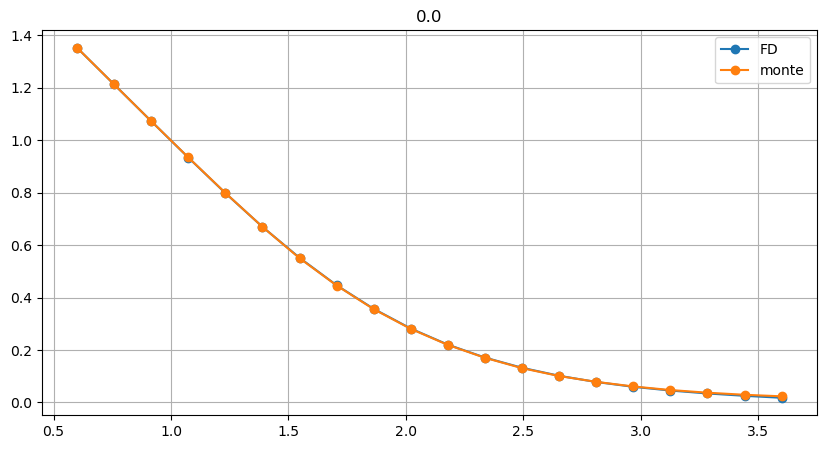

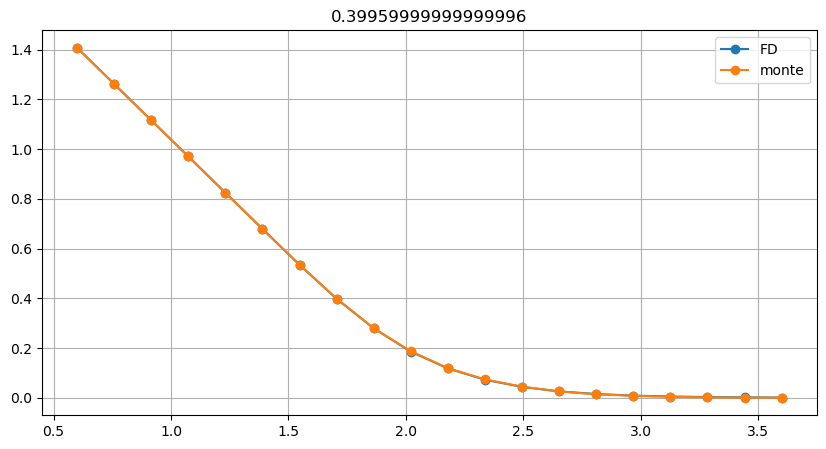

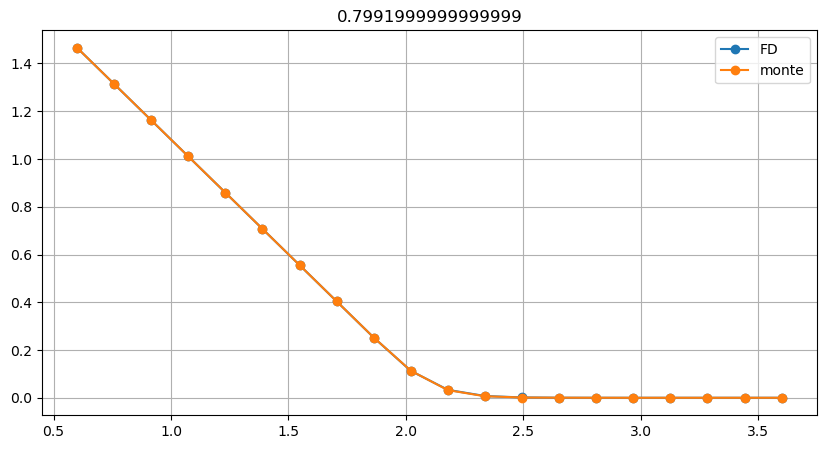

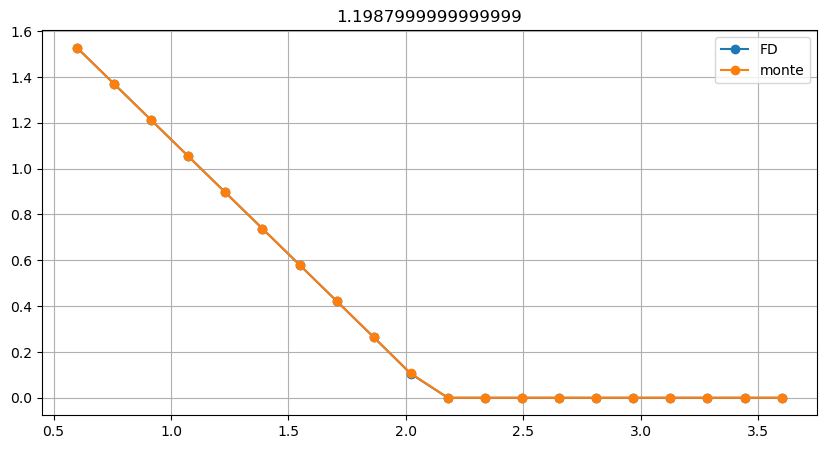

In [359]:
for nt in range(0, Nt, Nt // 3):

    t = tn[nt]
    
    St = S0 * np.exp(r * t)

    It = 0.5 * (St + S0) * t

    z_ = (It / T - Kn) / St

    c_monte = MonteCarloArithmeticMean(r, sig, t, T, St, It, Kn, Nsim, 200)
    
    tmp = interp1d(z, h[nt, :], kind='cubic')
    
    c_fd = St * tmp(z_)
    err = 100 * np.linalg.norm(c_fd - c_monte['MC_MM']) / np.linalg.norm(c_monte['MC_MM'])
    print(f'error = {err:4f}%')
    
    plt.figure(figsize=(10, 5))
    plt.title(f'{t}')
    plt.plot(Kn, c_fd, '-o', label='FD')
    plt.plot(Kn, c_monte['MC_MM'], '-o', label='monte')
    plt.grid()    
    plt.legend()
plt.show()

In [348]:
from sys import path
path.append('../finite differences/')

In [19]:
from solver import ADI_CS
from boundary_conditions import Dirichle, Neuman, Boundary2D

from problem_2d import Problem

from derivatives import DerCntrl

In [20]:
#model params
r = 0.025
sigma = 0.3
kappa = 1.5
theta =  0.04
rho = -0.9

#Option params:
K = 1.0
T = 1.0

#initial price
S0 = 1.0
#initial vol
v0 = 0.0175

In [21]:
def gridX(Nz):
    eps = 1e-3
    zn = np.linspace(-2, -eps, Nz + 1)
    wn = np.log(-zn)
    hw = np.diff(wn)
    return wn, hw

def gridY(Ny):
    Y = max(2.5, theta / sigma * 5.0)
    yn = Y * (np.linspace(0, 1, Ny + 1) ** 3 )
    hy = np.diff(yn)
    return yn, hy

def gridT(Nt):
    return T * (np.linspace(0, 1.0, Nt + 1) ** 1)

In [22]:
Xright = Dirichle(lambda y, t: 0)

Xleft = Dirichle(lambda y, t: (1 - np.exp(-r * t)) / (r * T))

Yleft = Neuman(lambda w, t: 0.0)

Yright = Neuman(lambda w, t: 0.0)

boundary = Boundary2D(Xleft, Xright, Yleft, Yright)

init = lambda w, y: 0.0

mux = lambda w, y: ( r + sig ** 2 / 2 + np.exp(-w) / T )
muy = lambda w, y: kappa * (theta - y * sigma) / sigma 

sigmax = lambda w, y: 0.5 * sigma * y
sigmay = lambda w, y: 0.5 * sigma * y
sigmaxy = lambda w, y: sigma * y * rho

problem = Problem(boundary, init, mux, muy, sigmax, sigmay, sigmaxy)

der = DerCntrl()

In [23]:
solverCS = ADI_CS(problem, der, gridX, gridY, gridT)

In [24]:
Nx = 100
Ny = 100
M = 12


xn, hx = gridX(Nx)
yn, hy = gridY(Ny)
tn = gridT(M)

In [25]:
uCS = solverCS.solve(Nx, Ny, M)

In [26]:
vn = yn * sigma

iy = np.where( vn <= v0 )[0][-1]

In [27]:
vn[iy], vn[iy + 1], 0.5 * (vn[iy] + vn[iy + 1])

(0.016464000000000003, 0.018291749999999996, 0.017377875)

In [28]:
u = 0.5 * (uCS[:, :, iy] +uCS[:, :, iy + 1]) 

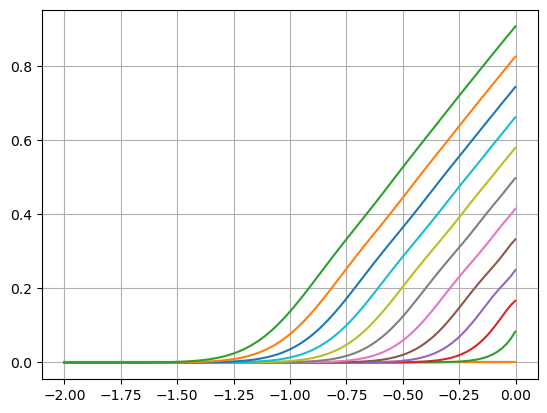

In [29]:
for t in range(M + 1):
    zn = -np.exp(xn)
    plt.plot(zn, u[t][::-1])
    plt.grid()
plt.show()